<a href="https://colab.research.google.com/github/DirasanthuSwetha/Diabetic-Retinopathy-Screening/blob/main/DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import glob
from PIL import Image

In [ ]:
# #tried with cv first
# filenames = glob.glob("/content/drive/My Drive/DiabeticRetinopathy/B. Disease Grading/1. Original Images/a. Training Set/*.jpg")
# filenames.sort()
# train_images = [cv2.imread(img) for img in filenames]
# print(np.shape(train_images))

In [ ]:
# def load_image( infilename ) :
#     img = Image.open( infilename )
#     img.load()
#     data = np.asarray( img, dtype="uint8" )
#     return data

In [ ]:
# filenames = glob.glob("/content/drive/My Drive/DiabeticRetinopathy/B. Disease Grading/1. Original Images/a. Training Set/*.jpg")
# filenames.sort()
# # train_images = [load_image(img) for img in filenames]
# train_images = []
# count = 0
# for img in filenames:
#   print(count)
#   train_images.append(load_image(img))
#   count += 1
# print(np.shape(train_images))

In [ ]:
# import pandas as pd

In [ ]:
# cd /content/drive/My Drive/DiabeticRetinopathy/

In [ ]:
# lab_path = '/content/drive/My Drive/DiabeticRetinopathy/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'
# file_path = '/content/drive/My Drive/DiabeticRetinopathy/B. Disease Grading/1. Original Images/b. Testing Set'


In [ ]:
# labels = pd.read_csv(lab_path)

In [ ]:
# labels['Retinopathy grade'].unique()

In [ ]:
# cd /content/drive/My Drive/DiabeticRetinopathy/

In [ ]:
# mkdir dis_grad_test

In [ ]:
# cd /content/drive/My Drive/DiabeticRetinopathy/dis_grad_test

In [ ]:
# !mkdir 0
# !mkdir 1
# !mkdir 2
# !mkdir 3
# !mkdir 4

In [ ]:
# labels.head()

In [ ]:
# labels['Image name'][0]

In [ ]:
# cp_path = file_path+'/'+labels['Image name'][0]+'.jpg'
# print(str(cp_path))
# !cp '$cp_path' '/content/'

In [ ]:
# print(file_path+labels['Image name'][0]+'.jpg')

In [ ]:
# dest_path = '/content/drive/My Drive/DiabeticRetinopathy/dis_grad_test'
# for i,v in labels.iterrows():
#   cp_path = file_path+'/'+v['Image name']+'.jpg'
#   dest  = dest_path+'/'+str(v['Retinopathy grade'])+'/'
#   print(i,cp_path,dest)
#   !cp '$cp_path' '$dest'
#   # print(v['Image name'],v['Retinopathy grade'])

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np

TensorFlow 2.x selected.


In [ ]:
%load_ext tensorboard

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_dir = '/content/drive/My Drive/DiabeticRetinopathy/dis_grad'
val_dir = '/content/drive/My Drive/DiabeticRetinopathy/dis_grad_test'

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
val_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
IMG_HEIGHT = int(2848/8)
IMG_WIDTH = int(4288/8)

In [ ]:
IMG_HEIGHT

356

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

val_data_gen = val_image_generator.flow_from_directory(batch_size=103,
                                                           directory=val_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')


Found 440 images belonging to 5 classes.
Found 103 images belonging to 5 classes.


In [ ]:
sample_training_images, sample_lables = next(train_data_gen)

In [ ]:
# for imgs, lab in next(train_data_gen):
#   print(np.shape(imgs),np.shape(lab))

In [ ]:
np.shape(sample_training_images)

(32, 356, 536, 3)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

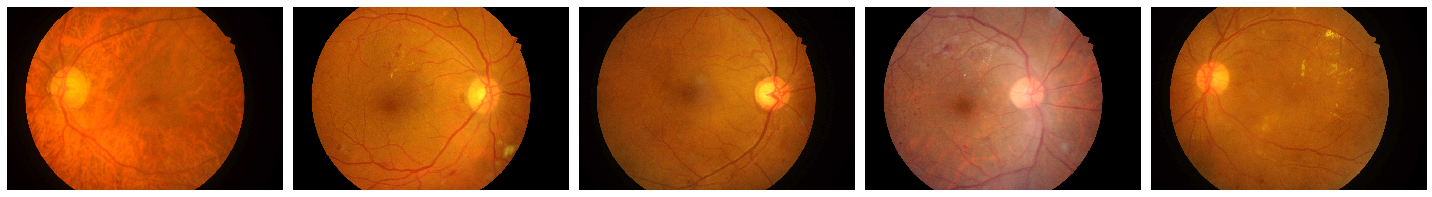

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
sample_lables

array([2., 2., 1., 3., 3., 2., 2., 0., 2., 3., 3., 1., 2., 3., 0., 0., 0.,
       0., 2., 3., 4., 3., 2., 3., 2., 2., 2., 0., 0., 0., 2., 2.],
      dtype=float32)

In [ ]:
HIDDEN_DIM = 512
NUM_CLASSES = 5

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
class network(tf.keras.Model):
  def __init__(self, hidden_dim, num_classes, reg = tf.keras.regularizers.l2(0.0001)):
    super(network,self).__init__()

    self.cnn1 = tf.keras.layers.Conv2D(32, 4, 4, activation = 'relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.cnn2 = tf.keras.layers.Conv2D(64, 3, 2, activation='relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.cnn3 = tf.keras.layers.Conv2D(128, 3, 2, activation='relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.l1 = tf.keras.layers.Dense(hidden_dim,activation='relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.l2 = tf.keras.layers.Dense(hidden_dim,activation = 'relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.l3 = tf.keras.layers.Dense(hidden_dim,activation = 'relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.out = tf.keras.layers.Dense(num_classes,kernel_regularizer=reg, activation='softmax', bias_regularizer=reg,)


  def call(self,obs):
    x = self.cnn1(obs)
    x = self.cnn2(x)
    fin_cnn_layer = self.cnn3(x)
    x = tf.keras.layers.Flatten()(fin_cnn_layer)
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    return self.out(x), fin_cnn_layer

In [ ]:
class network_pretrained(tf.keras.Model):
  def __init__(self, hidden_dim, num_classes, reg = tf.keras.regularizers.l2(0.0001)):
    super(network_pretrained,self).__init__()

    self.pretrained =  tf.keras.applications.MobileNetV2(input_shape=(356, 536, 3),
                                               include_top=False,
                                               weights='imagenet')
    fine_tune_at = 100
    # Freeze all the layers before the `fine_tune_at` layer
    for layer in self.pretrained.layers[:fine_tune_at]:
      layer.trainable =  False

    # self.cnn1 = tf.keras.layers.Conv2D(32, 4, 4, activation = 'relu', kernel_regularizer=reg, bias_regularizer=reg)

    # self.cnn2 = tf.keras.layers.Conv2D(64, 3, 2, activation='relu', kernel_regularizer=reg, bias_regularizer=reg)

    # self.cnn3 = tf.keras.layers.Conv2D(128, 3, 2, activation='relu', kernel_regularizer=reg, bias_regularizer=reg)

    self.l1 = tf.keras.layers.Dense(hidden_dim,activation='relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.l2 = tf.keras.layers.Dense(hidden_dim,activation = 'relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.l3 = tf.keras.layers.Dense(hidden_dim,activation = 'relu',kernel_regularizer=reg, bias_regularizer=reg)

    self.out = tf.keras.layers.Dense(num_classes,kernel_regularizer=reg, activation='softmax', bias_regularizer=reg,)


  def call(self,obs):
    fin_cnn_layer = self.pretrained(obs)
    # x = self.cnn1(obs)
    # x = self.cnn2(x)
    # fin_cnn_layer = self.cnn3(x)
    x = tf.keras.layers.Flatten()(fin_cnn_layer)
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    # return self.out(x)
    return  self.out(x),fin_cnn_layer

In [ ]:
images,_ =  next(train_data_gen)


In [ ]:
images = tf.convert_to_tensor(images, dtype=tf.float32)
model = network_pretrained(512,5)

out,_ = model(images)

/tensorflow-2.1.0/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 1s 0us/step


In [ ]:
out.shape

TensorShape([32, 5])

In [ ]:
IMG_SHAPE = (356, 536, 3)
image_batch = (32, 356, 536, 3)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
@tf.function
def train_step(images, labels):

  # print(tf.shape(labels))

  with tf.GradientTape() as tape:
    predictions,_ = model(images, training=True)
    loss = loss_object(labels, predictions)

  # print('Loss : ',loss)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):

  # print(np.shape(images),np.shape(labels))
  predictions,_ = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
import datetime

In [ ]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = '/content/drive/My Drive/DiabeticRetinopathy/logs/' + current_time + '/train'
test_log_dir = '/content/drive/My Drive/DiabeticRetinopathy/logs/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [ ]:
EPOCHS = 1000

# train_writer = tf.summary.create_file_writer(STORE_PATH + f"/content/drive/My Drive/DiabeticRetinopathy/logs_{dt.datetime.now().strftime('%d%m%Y%H%M')}")

for epoch in range(EPOCHS):
  # print(epoch)
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


  images,labels = next(train_data_gen)
  # print(np.shape(images),np.shape(labels))
  images = tf.convert_to_tensor(images, dtype=tf.float32)
  labels = tf.convert_to_tensor(labels, dtype=tf.int32)
  train_step(images, labels)

  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

  test_images, test_labels = next(val_data_gen)
  test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)
  test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)
  test_step(test_images, test_labels)

  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epoch 1, Loss: 1.6165950298309326, Accuracy: 12.5, Test Loss: 1.5834871530532837, Test Accuracy: 29.1262149810791
Epoch 2, Loss: 1.5216978788375854, Accuracy: 31.25, Test Loss: 1.713898777961731, Test Accuracy: 18.44660186767578
Epoch 3, Loss: 1.6371679306030273, Accuracy: 25.0, Test Loss: 1.6615248918533325, Test Accuracy: 17.47572898864746
Epoch 4, Loss: 1.5343677997589111, Accuracy: 34.375, Test Loss: 1.5450727939605713, Test Accuracy: 33.9805793762207
Epoch 5, Loss: 1.4297139644622803, Accuracy: 50.0, Test Loss: 1.5917752981185913, Test Accuracy: 31.067960739135742
Epoch 6, Loss: 1.2984874248504639, Accuracy: 62.5, Test Loss: 1.59414803981781, Test Accuracy: 31.067960739135742
Epoch 7, Loss: 1.593928575515747, Accuracy: 31.25, Test Loss: 1.5941517353057861, Test Accuracy: 31.067960739135742
Epoch 8, Loss: 1.622978687286377, Accuracy: 28.125, Test Loss: 1.5941523313522339, Test Accuracy: 31.067960739135742
Epoch 9, Loss: 1.5567691326141357, Accuracy: 34.375, Test Loss: 1.59415268898

KeyboardInterrupt: ignored

In [ ]:
%tensorboard --logdir '/content/drive/My Drive/DiabeticRetinopathy/logs'

<IPython.core.display.Javascript object>

In [ ]:
import PIL.Image
from matplotlib import pylab as P
import pickle
import os

In [ ]:
def grad_cam(x_value, should_resize = True, three_dims = False):

    with tf.GradientTape() as tape:
      out,c_layer = model(x_value, training = False)
      y = tf.reduce_max(out,1)
      print(tf.shape(y))
  # print('Loss : ',loss)
    grad = tape.gradient(y, c_layer)[0]
    # grad = tf.gradients(y, c_layer)[0]
    print("c_layer sh",c_layer.shape)
    output = c_layer[0]
    weights = np.mean(grad,axis=(0,1))
    grad_cam = np.zeros(output.shape[0:2], dtype=np.float32)

    print("output shape: ",tf.shape(output))
    for i, w in enumerate(weights):
      grad_cam += w * output[:, :, i]
    print(grad_cam.shape)
    grad_cam = np.maximum(grad_cam, 0)


    print(x_value.shape)
    # resize heatmap to be the same size as the input
    if should_resize:
      grad_cam = grad_cam / np.max(grad_cam) # values need to be [0,1] to be resized
      print(tf.shape(grad_cam))
      # grad_cam = tf.squeeze(tf.image.resize_b)

      grad_cam = np.squeeze(tf.image.resize(np.expand_dims(np.expand_dims(grad_cam, 0), 3),
                      x_value.shape[1:3],
                      preserve_aspect_ratio=False,
                      antialias=False,
                      name=None))
      # grad_cam = np.squeeze(tf.image.resize_bilinear(
      #         np.expand_dims(np.expand_dims(grad_cam, 0), 3),
      #         x_value.shape[:2]).eval(session=self.session))

    # convert grayscale to 3-D
    if three_dims:
      grad_cam = np.expand_dims(grad_cam, axis=2)
      grad_cam = np.tile(grad_cam,[1,1,3])

    return grad_cam

In [ ]:
# Boilerplate methods.
def ShowImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  im = ((im + 1) * 127.5).astype(np.uint8)
  P.imshow(im)
  P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')

  P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
  P.title(title)

def ShowHeatMap(im, title, ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im, cmap='viridis')
  P.title(title)

def ShowDivergingImage(grad, title='', percentile=99, ax=None):
  if ax is None:
    fig, ax = P.subplots()
  else:
    fig = ax.figure

  P.axis('off')
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  im = ax.imshow(grad, cmap=P.cm.coolwarm, vmin=-1, vmax=1)
  fig.colorbar(im, cax=cax, orientation='vertical')
  P.title(title)

def LoadImage(file_path):
  im = PIL.Image.open(file_path)
  im = np.asarray(im)
  return im / 127.5 - 1.0

In [ ]:
gc_out.shape

(356, 536, 3)

In [ ]:
sample_imgs,_ = next(val_data_gen)

sample_imgs = tf.convert_to_tensor(sample_imgs[0], dtype=tf.float32)

sample_imgs = tf.expand_dims(sample_imgs,0)

# out,cnn_layer = model(sample_imgs, training = False)




In [ ]:
gc_out = grad_cam(sample_imgs)

tf.Tensor([1], shape=(1,), dtype=int32)
c_layer sh (1, 12, 17, 1280)
output shape:  tf.Tensor([  12   17 1280], shape=(3,), dtype=int32)
(12, 17)
(1, 356, 536, 3)
tf.Tensor([12 17], shape=(2,), dtype=int32)


In [ ]:
gc_out.shape

(356, 536)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

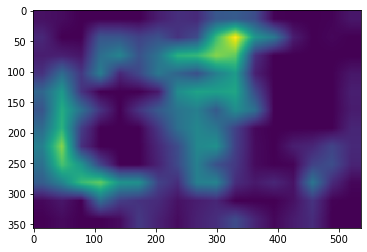

In [ ]:
plt.imshow(gc_out)

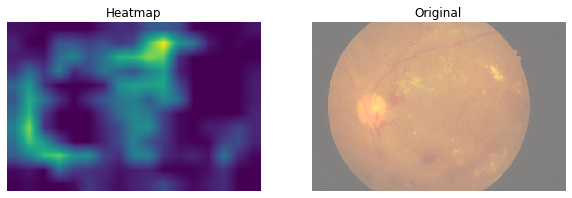

In [ ]:
# Set up matplot lib figures.
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks.
ShowHeatMap(gc_out, title='Heatmap', ax=P.subplot(ROWS, COLS, 1))
ShowImage(sample_imgs[0].numpy(), title='Original', ax=P.subplot(ROWS, COLS, 2))

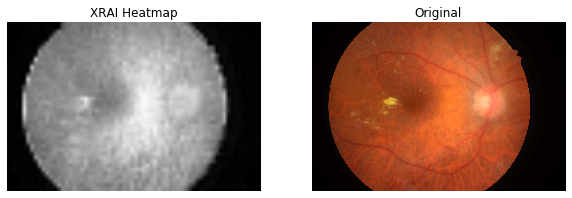

In [ ]:
# Set up matplot lib figures.
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
P.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks.
ShowHeatMap(gc_out, title='XRAI Heatmap', ax=P.subplot(ROWS, COLS, 1))
ShowGrayscaleImage(sample_imgs[0], title='Original', ax=P.subplot(ROWS, COLS, 2))